## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [2]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_aus = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_aus.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: Australia


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,australia,01/01/1970,62.3,55.1,59.9,NaN,NaN,0.0,NaN,19.5,NaN,NaN,97.5,82.74,Overcast
1,australia,01/02/1970,53.9,50.3,51.9,NaN,NaN,0.0,NaN,18.3,NaN,NaN,93.8,78.11,Overcast
2,australia,01/03/1970,56.0,48.8,52.3,43.4,NaN,0.0,NaN,15.0,NaN,NaN,100.0,85.87,Overcast
3,australia,01/04/1970,64.1,51.2,56.3,NaN,NaN,0.0,NaN,16.1,NaN,NaN,91.3,83.15,Overcast
4,australia,01/05/1970,72.2,50.3,61.4,NaN,NaN,0.0,NaN,11.4,NaN,NaN,75.0,71.98,Partially cloudy


### Random Slice of Data
<hr>

In [4]:
df_aus.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
13300,australia,06/01/2006,48.3,44.7,46.6,42.1,NaN,0.48,NaN,7.1,NaN,6.6,84.6,94.75,"Rain, Overcast"
16270,australia,07/19/2014,53.0,28.6,41.0,27.4,NaN,0.00,NaN,21.9,NaN,6.2,17.7,66.37,Clear
5319,australia,07/25/1984,53.0,36.2,44.5,30.6,NaN,0.00,NaN,15.0,NaN,30.0,48.3,74.04,Partially cloudy
7390,australia,03/27/1990,77.3,58.7,66.7,NaN,NaN,0.02,NaN,9.2,NaN,27.2,57.0,62.98,"Rain, Partially cloudy"
14559,australia,11/11/2009,90.6,51.6,71.7,NaN,86.5,0.00,NaN,17.2,NaN,10.4,2.3,31.75,Clear


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [5]:
df_aus.shape

(18570, 15)

In [6]:
#printing missing data sum
df_aus.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill             10058
Heat Index             15539
Precipitation              0
Snow Depth             18539
Wind Speed                 0
Wind Gust              18401
Visibility              1107
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

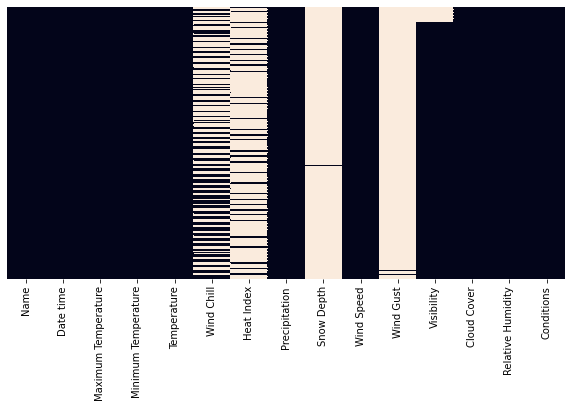

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_aus.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [8]:
df_aus.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [9]:
df_aus.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18565,australia,10/30/2020,67.9,44.9,56.9,0.0,19.7,6.2,68.8,81.20,Partially cloudy
18566,australia,10/31/2020,58.9,51.7,54.4,0.0,15.0,6.1,95.4,92.79,Overcast
18567,australia,11/01/2020,69.7,51.7,58.4,0.0,21.9,6.2,81.1,71.76,Overcast
18568,australia,11/02/2020,69.7,42.7,57.9,0.0,10.3,6.2,61.0,71.66,Partially cloudy
18569,australia,11/03/2020,75.1,48.1,61.1,0.0,10.3,6.2,92.9,75.28,Overcast


In [10]:
#Mean Imputing for visibility
df_aus['Visibility'].fillna(df_aus['Visibility'].mean(), inplace = True)
print(df_aus.isnull().sum())

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [11]:
#minimum value for temperature
df_aus['Temperature'].min()

30.4

In [12]:
#maximum value for temperature
df_aus['Temperature'].max()

93.7

In [13]:
#minimim value for temperature
df_aus['Precipitation'].min()

0.0

In [14]:
#maximum value for precipitation
df_aus['Precipitation'].max()

4.33

In [15]:
#ToDO - Update feature details

In [16]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Humidity affects Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [17]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_aus.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_aus['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [18]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.0,19.5,16.560013,97.5,82.74
1,0.0,18.3,16.560013,93.8,78.11
2,0.0,15.0,16.560013,100.0,85.87
3,0.0,16.1,16.560013,91.3,83.15
4,0.0,11.4,16.560013,75.0,71.98


In [19]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [20]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_aus.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_aus['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [21]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

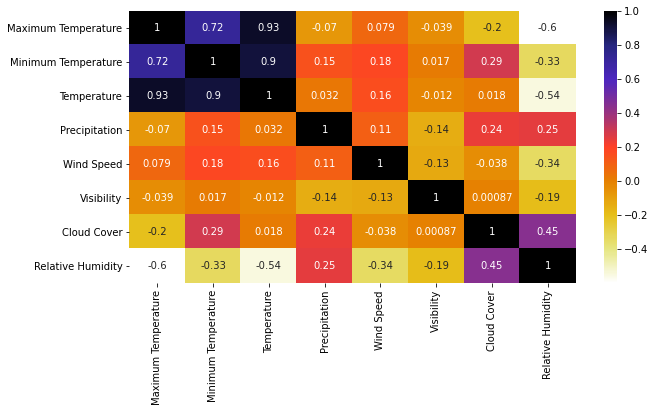

In [22]:
plt.figure(figsize=(10,5))
c= df_aus.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is inversely correlated with Visibility(very low) and relative humidity(highly negative) and not much correlation with Cloud cover,Wind Speed and precipitation

For `Precipitation`, It is not highly correlated with any other feature, but slightly correlated with Cloud cover and Relative Humidity and almost inverse correlation with Maximum Temperature and Visibility

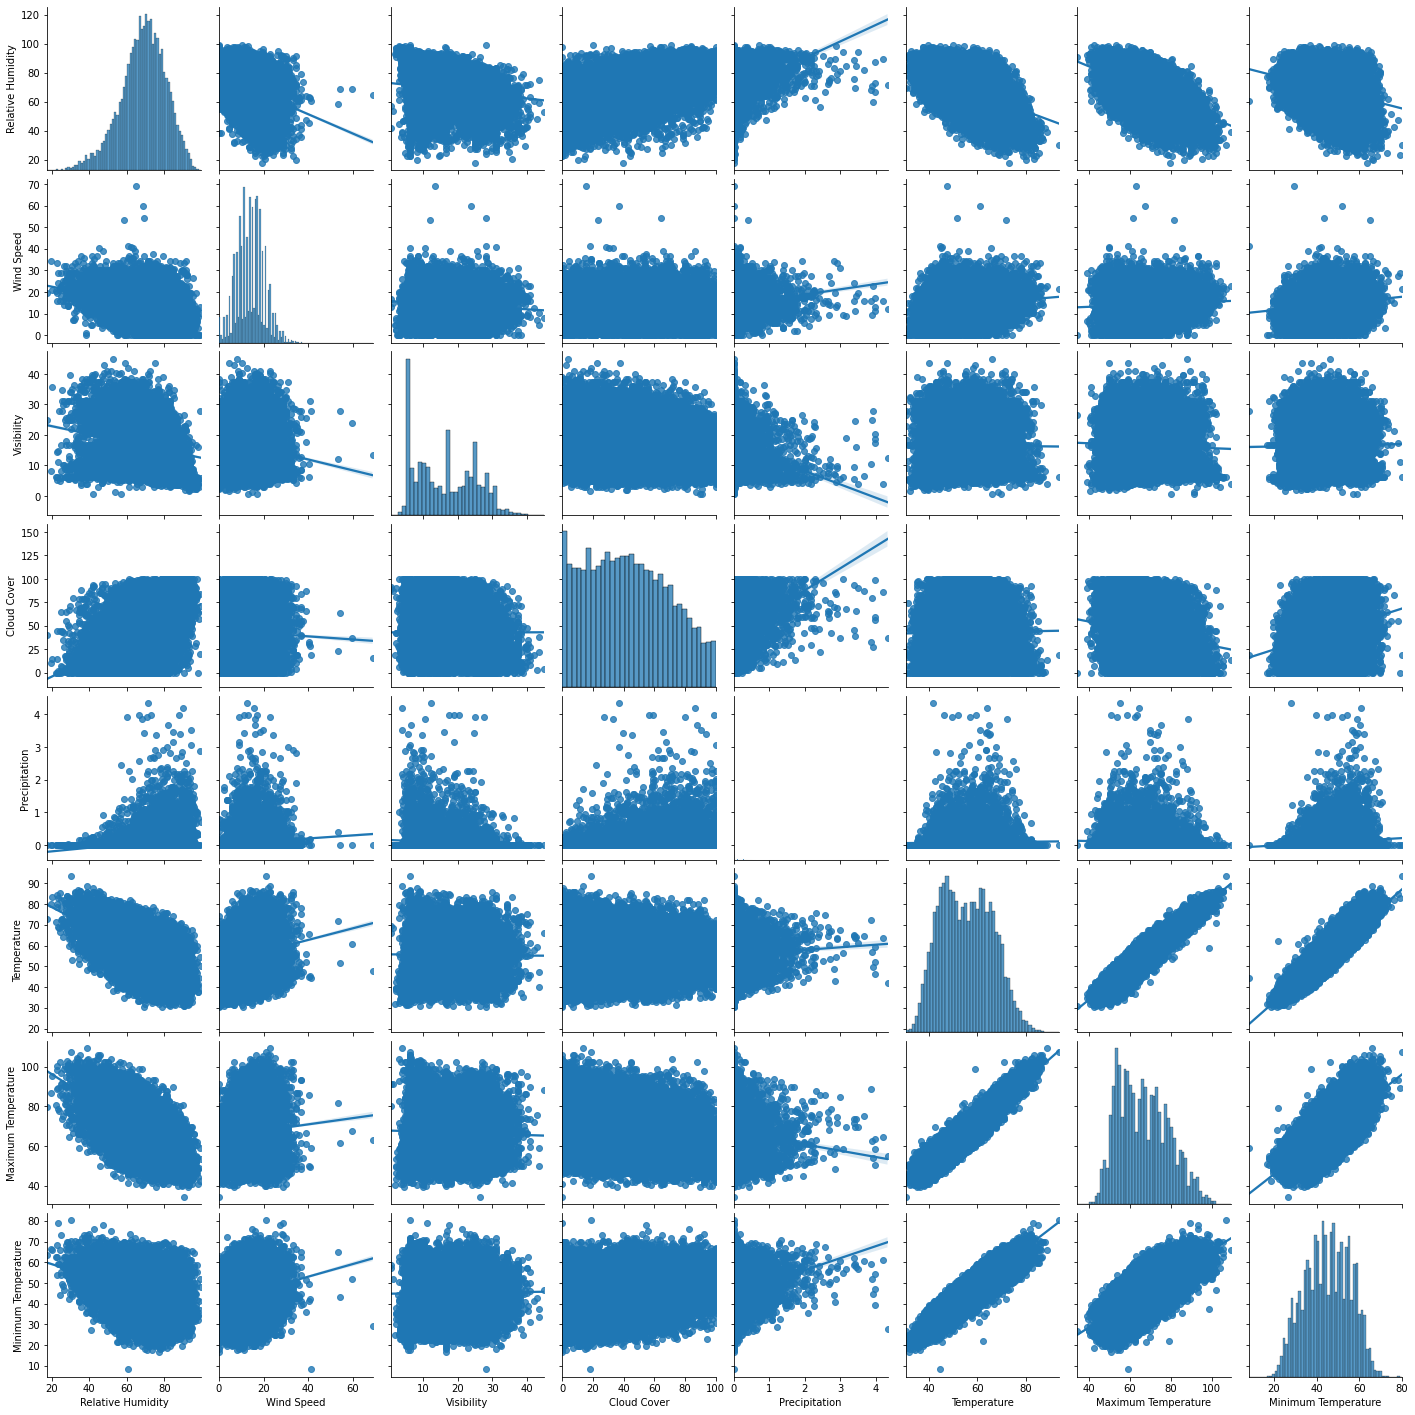

In [23]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_aus[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation expect for Relative Humidity , it is inverse

For Precipitation, we can see majority of values are not correlated in any way. It lies in the range of 0-1 for many feature values.There is no obvious relation between any features and precipitation. There is a slight correaltion with Cloud cover, Visibility, Wind speed and relative humidity.

#### 3.3 Using Feature Transformation for conditions

In [23]:
df_aus['Conditions'] = df_aus['Conditions'].astype('category')

In [24]:
df_aus_conditions = pd.get_dummies(df_aus['Conditions'])

In [25]:
df_aus  = pd.concat([df_aus,df_aus_conditions],axis=1)

In [26]:
df_aus.drop(columns=['Conditions'],inplace=True)

In [27]:
#df_aus  = pd.concat([df_aus,df_aus_conditions],axis=1)

In [28]:
df_aus.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Partially cloudy"
0,australia,01/01/1970,62.3,55.1,59.9,0.0,19.5,16.560013,97.5,82.74,0,1,0,0,0,0,0,0
1,australia,01/02/1970,53.9,50.3,51.9,0.0,18.3,16.560013,93.8,78.11,0,1,0,0,0,0,0,0
2,australia,01/03/1970,56.0,48.8,52.3,0.0,15.0,16.560013,100.0,85.87,0,1,0,0,0,0,0,0
3,australia,01/04/1970,64.1,51.2,56.3,0.0,16.1,16.560013,91.3,83.15,0,1,0,0,0,0,0,0
4,australia,01/05/1970,72.2,50.3,61.4,0.0,11.4,16.560013,75.0,71.98,0,0,1,0,0,0,0,0


In [29]:
df_aus.to_csv("australia_cleaned.csv")

## Regression

(array([3.100e+02, 2.109e+03, 3.783e+03, 3.362e+03, 3.373e+03, 3.237e+03,
        1.781e+03, 5.270e+02, 8.500e+01, 3.000e+00]),
 array([30.4 , 36.73, 43.06, 49.39, 55.72, 62.05, 68.38, 74.71, 81.04,
        87.37, 93.7 ]),
 <BarContainer object of 10 artists>)

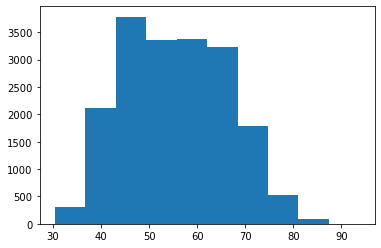

In [30]:
plt.hist(df_aus['Temperature'])

(array([1.7446e+04, 6.5100e+02, 2.6500e+02, 1.1400e+02, 4.8000e+01,
        1.8000e+01, 1.2000e+01, 6.0000e+00, 3.0000e+00, 7.0000e+00]),
 array([0.   , 0.433, 0.866, 1.299, 1.732, 2.165, 2.598, 3.031, 3.464,
        3.897, 4.33 ]),
 <BarContainer object of 10 artists>)

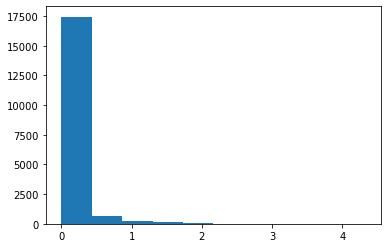

In [31]:
plt.hist(df_aus['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [32]:
#considering only relative humidity and windspeed
X_temp=df_aus.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Name','Date time','Cloud Cover','Visibility'],axis=1)
Y_temp=df_aus.Temperature

#### Importing the train test split function for Temperature

In [57]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp,test_size=0.4)

In [58]:
train_X_temp.head()

,Wind Speed,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Partially cloudy"
15809,13.6,59.31,1,0,0,0,0,0,0,0
14219,21.9,41.17,0,0,0,1,0,0,0,0
1407,8.1,67.02,0,0,1,0,0,0,0,0
5619,10.3,70.41,1,0,0,0,0,0,0,0
663,25.2,61.40,0,0,1,0,0,0,0,0


In [59]:
train_y_temp.head()

15809    60.4
14219    71.1
1407     61.5
5619     44.6
663      60.2
Name: Temperature, dtype: float64

In [60]:
#getting the shape for training data
train_X_temp.shape

(11142, 10)

In [61]:
train_y_temp.shape

(11142,)

In [62]:
#getting the shape for test data
test_X_temp.shape

(7428, 10)

### 1. Implementing Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score 
import math

In [118]:
lr = LR(normalize=True)
kfold = KFold(n_splits=10)#using KFold cross validation
mse_scores = -np.round(cross_val_score(lr,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[8.54400374531753, 8.18535277187245, 8.306623862918075, 8.54400374531753, 8.426149773176359, 8.602325267042627, 8.48528137423857, 8.246211251235321, 8.426149773176359, 8.246211251235321]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:8.401231281553015


Text(0, 0.5, 'Root Mean Square Error')

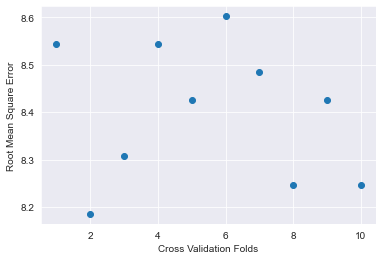

In [119]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [120]:
# Predicting over the Train Set and calculating error
lr.fit(train_X_temp,train_y_temp)
train_predict = lr.predict(train_X_temp)
linear_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 8.390372190994492


In [122]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
linear_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )
linear_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Linear regression',linear_r2_score)

Test Root Mean Squared Error 8.499258525172149
R2 Square Error for Linear regression 0.3674779896468965


### Knn Algorithm

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
x_scaled= MinMaxScaler()
train_X_temp[['Wind Speed','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Wind Speed','Relative Humidity']])

x_test_scaled= MinMaxScaler()
test_X_temp[['Wind Speed','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Wind Speed','Relative Humidity']])

In [124]:
from sklearn import neighbors
n_neighbors=19 #came up with 19 after hyper-paramter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,leaf_size=2,n_jobs=-1)
mse_scores = -np.round(cross_val_score(knn,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[8.426149773176359, 8.0, 8.18535277187245, 8.306623862918075, 8.18535277187245, 8.54400374531753, 8.366600265340756, 8.246211251235321, 8.366600265340756, 8.18535277187245]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:8.281224747894614


Text(0, 0.5, 'Root Mean Square Error')

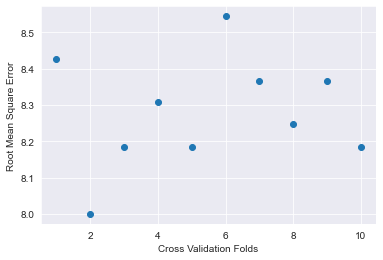

In [125]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [127]:
# Predicting over the Train Set and calculating error
knn.fit(train_X_temp,train_y_temp)
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 7.852593387087715


In [128]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 8.643958446174437
R2 Square Error for KNN regression 0.34575727154128866


### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

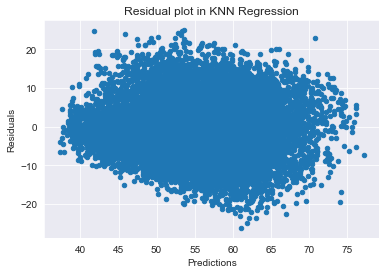

In [129]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [135]:
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
xgb = XGBRegressor()
mse_scores = -np.round(cross_val_score(xgb,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[12:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

Text(0, 0.5, 'Root Mean Square Error')

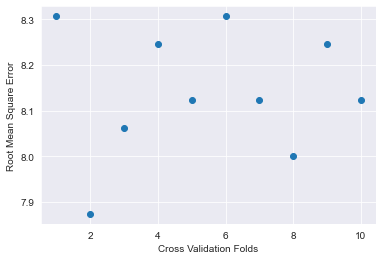

In [138]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [136]:
# Predicting over the Train Set and calculating error
xgb.fit(train_X_temp,train_y_temp)
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

[12:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Root Mean Squared Error 7.977070634960967


In [137]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 8.386822679141407
R2 Square Error for Gradient Boosting regression 0.38410243746370665


### Residual plot in Gradient Boosting

Text(0.5, 1.0, 'Residual plot in Random Forest Regression')

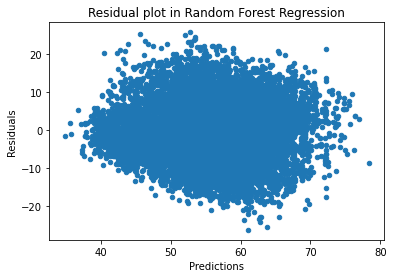

In [76]:
preds = pd.DataFrame({"preds":xgb.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Random Forest Regression")

### Decision Tree Regressor

In [139]:
from sklearn import tree
#Paraemeters passed here are tuned using Hyper-parameter tuning
dec = tree.DecisionTreeRegressor(max_features="auto",min_samples_leaf=9,min_samples_split=3,max_depth=6)
mse_scores = -np.round(cross_val_score(dec,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[8.54400374531753, 8.06225774829855, 8.246211251235321, 8.366600265340756, 8.246211251235321, 8.602325267042627, 8.366600265340756, 8.18535277187245, 8.426149773176359, 8.246211251235321]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:8.3291923590095


Text(0, 0.5, 'Root Mean Square Error')

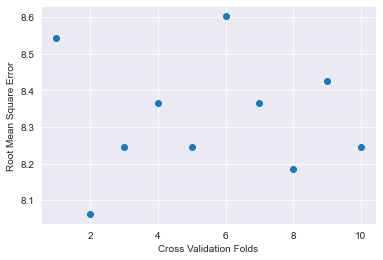

In [140]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [141]:
# Predicting over the Train Set and calculating error
dec.fit(train_X_temp,train_y_temp)
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 8.118936478232358


In [142]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 8.545138008379151
R2 Square Error for Decision Tree regression 0.36063077866037874


### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

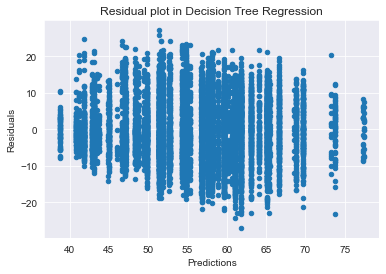

In [143]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

###  Support Vector Regression for Temperature

#### Pre processing features

In [144]:
from sklearn.svm import SVR

model1=SVR(kernel="rbf",C=12) #Came up with parameters after parameter tuning
mse_scores = -np.round(cross_val_score(model1,train_X_temp,train_y_temp,scoring='neg_mean_squared_error',cv=kfold))
rmse_scores=[math.sqrt(i) for i in mse_scores]
print(rmse_scores)

print('**********************')
print('Cross_Validation_Root_Mean_Score_Error Mean:{}'.format(np.mean(rmse_scores)))

[8.366600265340756, 7.937253933193772, 8.12403840463596, 8.426149773176359, 8.246211251235321, 8.366600265340756, 8.306623862918075, 8.12403840463596, 8.366600265340756, 8.06225774829855]
**********************
Cross_Validation_Root_Mean_Score_Error Mean:8.232637417411626


Text(0, 0.5, 'Root Mean Square Error')

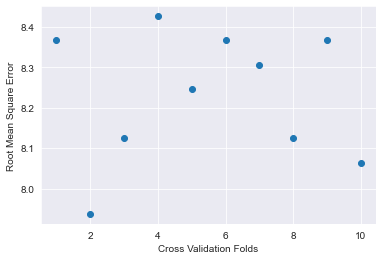

In [145]:
#Plot cross validation  vs root mean square error
sns.set_style('darkgrid')
x_val = [i for i in range(1,11)]
plt.scatter(x_val,rmse_scores)
plt.xlabel("Cross Validation Folds")
plt.ylabel("Root Mean Square Error")

In [146]:
# Predicting over the Train Set and calculating error
model1.fit(train_X_temp,train_y_temp)
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 8.207974128650363


In [147]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 8.55671809140948
R2 Square Error for SVM regression 0.35889670123442385


### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

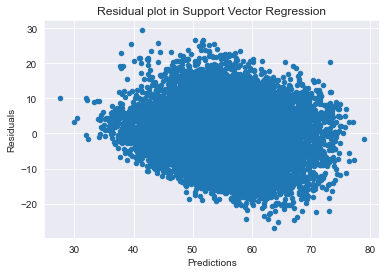

In [148]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [151]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','XGBoost Regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,8.390372,8.499259
K-Nearest,7.852593,8.643958
XGBoost Regressor,7.977071,8.386823
Decision Tree,8.118936,8.545138
SVM,8.207974,8.556718


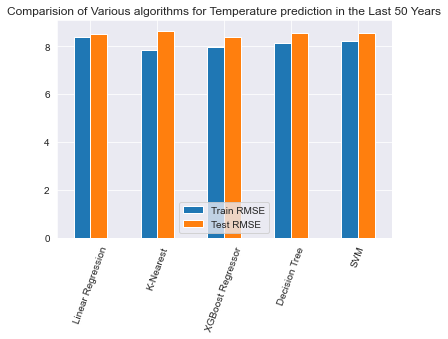

In [152]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [153]:
test_r2_square_error=[linear_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square
Ridge Regression,0.367478
K-Nearest,0.345757
Gradent Boost,0.384102
Decision Tree,0.360631
SVM,0.358897


Text(0.5, 1.0, 'R2 Square for Various Models')

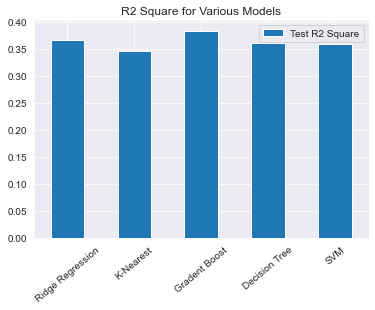

In [154]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [155]:
# Considering only cloud cover and relative Humidity
X_prec=df_aus.drop(columns=['Precipitation','Name','Date time','Maximum Temperature','Minimum Temperature','Temperature','Visibility',
                           'Wind Speed'],axis=1)
Y_prec=df_aus.Precipitation

In [156]:
X_prec.head()

,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Partially cloudy"
0,97.5,82.74,0,1,0,0,0,0,0,0
1,93.8,78.11,0,1,0,0,0,0,0,0
2,100.0,85.87,0,1,0,0,0,0,0,0
3,91.3,83.15,0,1,0,0,0,0,0,0
4,75.0,71.98,0,0,1,0,0,0,0,0


#### Importing the train test split function for Precipitation

In [157]:
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec)

### Ridge Regression

In [160]:
lr = LR(normalize=True)
lr.fit(train_X_prec,train_y_prec)
y_predict=lr.predict(test_X_prec)

In [163]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_prec)
linear_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(linear_train_error) )

Training Root Mean Squared Error 0.23176879801706693


In [165]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_prec)
linear_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(linear_test_error) )

Test Root Mean Squared Error 0.23184277614654492


### Knn Algorithm

In [166]:
#Preprocessing features
x_scaled=StandardScaler()
train_X_prec[['Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Cloud Cover','Relative Humidity']])

In [167]:
n_neighbors=10 #came up with 10 after hyper-paremter tuning for nearest neighbours
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [168]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 0.21095530080742714


In [169]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 0.23902941575903305


### Decision Tree Regressor

In [170]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [171]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 0.2541784722821697


In [172]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )

Test Root Mean Squared Error 0.2540751393873155


### Gradient Boosting Regressor

In [173]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[12:58:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [174]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 0.2155519464766615


In [175]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 0.2288191471155717


### Support Vector Regression for Precipitation

In [176]:
model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [177]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 0.241676914474631


In [178]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )

Test Root Mean Squared Error 0.24104186526714189


### Getting the Graph for all Models RMSE

In [184]:
train_error=[linear_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[linear_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Linear Regression','K-Nearest','XGBoost regressor','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Linear Regression,0.231769,0.231843
K-Nearest,0.210955,0.239029
XGBoost regressor,0.215552,0.228819
Decision Tree,0.254178,0.254075
SVM,0.241677,0.241042


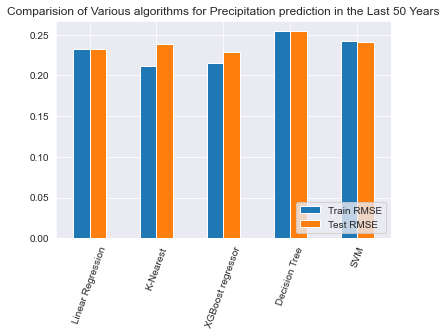

In [185]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.legend(loc='lower right')
plt.show()